In [1]:
!pip install -q tensorflow==2.0.0-beta1
!pip install --upgrade --quiet git+https://github.com/mokahaiku/toai
!pip install -q kaggle

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]=""

In [4]:
from toai.imports import *

In [5]:
DATA_DIR = Path('data/')
TEMP_DIR = Path('temp/')

In [ ]:
# !kaggle competitions download -c house-prices-advanced-regression-techniques -p {DATA_DIR}

# Data

In [6]:
df = pd.read_csv(DATA_DIR/'train.csv')

In [22]:
df.head(10).T

0        1        2        3        4        5        6  \
Id                   1        2        3        4        5        6        7   
MSSubClass          60       20       60       70       60       50       20   
MSZoning            RL       RL       RL       RL       RL       RL       RL   
LotFrontage         65       80       68       60       84       85       75   
LotArea           8450     9600    11250     9550    14260    14115    10084   
Street            Pave     Pave     Pave     Pave     Pave     Pave     Pave   
Alley              NaN      NaN      NaN      NaN      NaN      NaN      NaN   
LotShape           Reg      Reg      IR1      IR1      IR1      IR1      Reg   
LandContour        Lvl      Lvl      Lvl      Lvl      Lvl      Lvl      Lvl   
Utilities       AllPub   AllPub   AllPub   AllPub   AllPub   AllPub   AllPub   
LotConfig       Inside      FR2   Inside   Corner      FR2   Inside   Inside   
LandSlope          Gtl      Gtl      Gtl      Gtl      Gtl      Gtl      Gtl   
Neighborhood   CollgCr  Veenker  CollgCr  Crawfor  NoRidge  Mitchel  Somerst   
Condition1        Norm    Feedr     Norm     Norm     Norm     Norm     Norm   
Condition2        Norm     Norm     Norm     Norm     Norm     Norm     Norm   
BldgType          1Fam     1Fam     1Fam     1Fam     1Fam     1Fam     1Fam   
HouseStyle      2Story   1Story   2Story   2Story   2Story   1.5Fin   1Story   
OverallQual          7        6        7        7        8        5        8   
OverallCond          5        8        5        5        5        5        5   
YearBuilt         2003     1976     2001     1915     2000     1993     2004   
YearRemodAdd      2003     1976     2002     1970     2000     1995     2005   
RoofStyle        Gable    Gable    Gable    Gable    Gable    Gable    Gable   
RoofMatl       CompShg  CompShg  CompShg  CompShg  CompShg  CompShg  CompShg   
Exterior1st    VinylSd  MetalSd  VinylSd  Wd Sdng  VinylSd  VinylSd  VinylSd   
Exterior2nd    VinylSd  MetalSd  VinylSd  Wd Shng  VinylSd  VinylSd  VinylSd   
MasVnrType     BrkFace     None  BrkFace     None  BrkFace     None    Stone   
MasVnrArea         196        0      162        0      350        0      186   
ExterQual           Gd       TA       Gd       TA       Gd       TA       Gd   
ExterCond           TA       TA       TA       TA       TA       TA       TA   
Foundation       PConc   CBlock    PConc   BrkTil    PConc     Wood    PConc   
...                ...      ...      ...      ...      ...      ...      ...   
BedroomAbvGr         3        3        3        3        4        1        3   
KitchenAbvGr         1        1        1        1        1        1        1   
KitchenQual         Gd       TA       Gd       Gd       Gd       TA       Gd   
TotRmsAbvGrd         8        6        6        7        9        5        7   
Functional         Typ      Typ      Typ      Typ      Typ      Typ      Typ   
Fireplaces           0        1        1        1        1        0        1   
FireplaceQu        NaN       TA       TA       Gd       TA      NaN       Gd   
GarageType      Attchd   Attchd   Attchd   Detchd   Attchd   Attchd   Attchd   
GarageYrBlt       2003     1976     2001     1998     2000     1993     2004   
GarageFinish       RFn      RFn      RFn      Unf      RFn      Unf      RFn   
GarageCars           2        2        2        3        3        2        2   
GarageArea         548      460      608      642      836      480      636   
GarageQual          TA       TA       TA       TA       TA       TA       TA   
GarageCond          TA       TA       TA       TA       TA       TA       TA   
PavedDrive           Y        Y        Y        Y        Y        Y        Y   
WoodDeckSF           0      298        0        0      192       40      255   
OpenPorchSF         61        0       42       35       84       30       57   
EnclosedPorch        0        0        0      272        0        0        0   
3SsnPorch            

In [23]:
df.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [29]:
print(df.isnull().sum().to_string())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## EDA

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


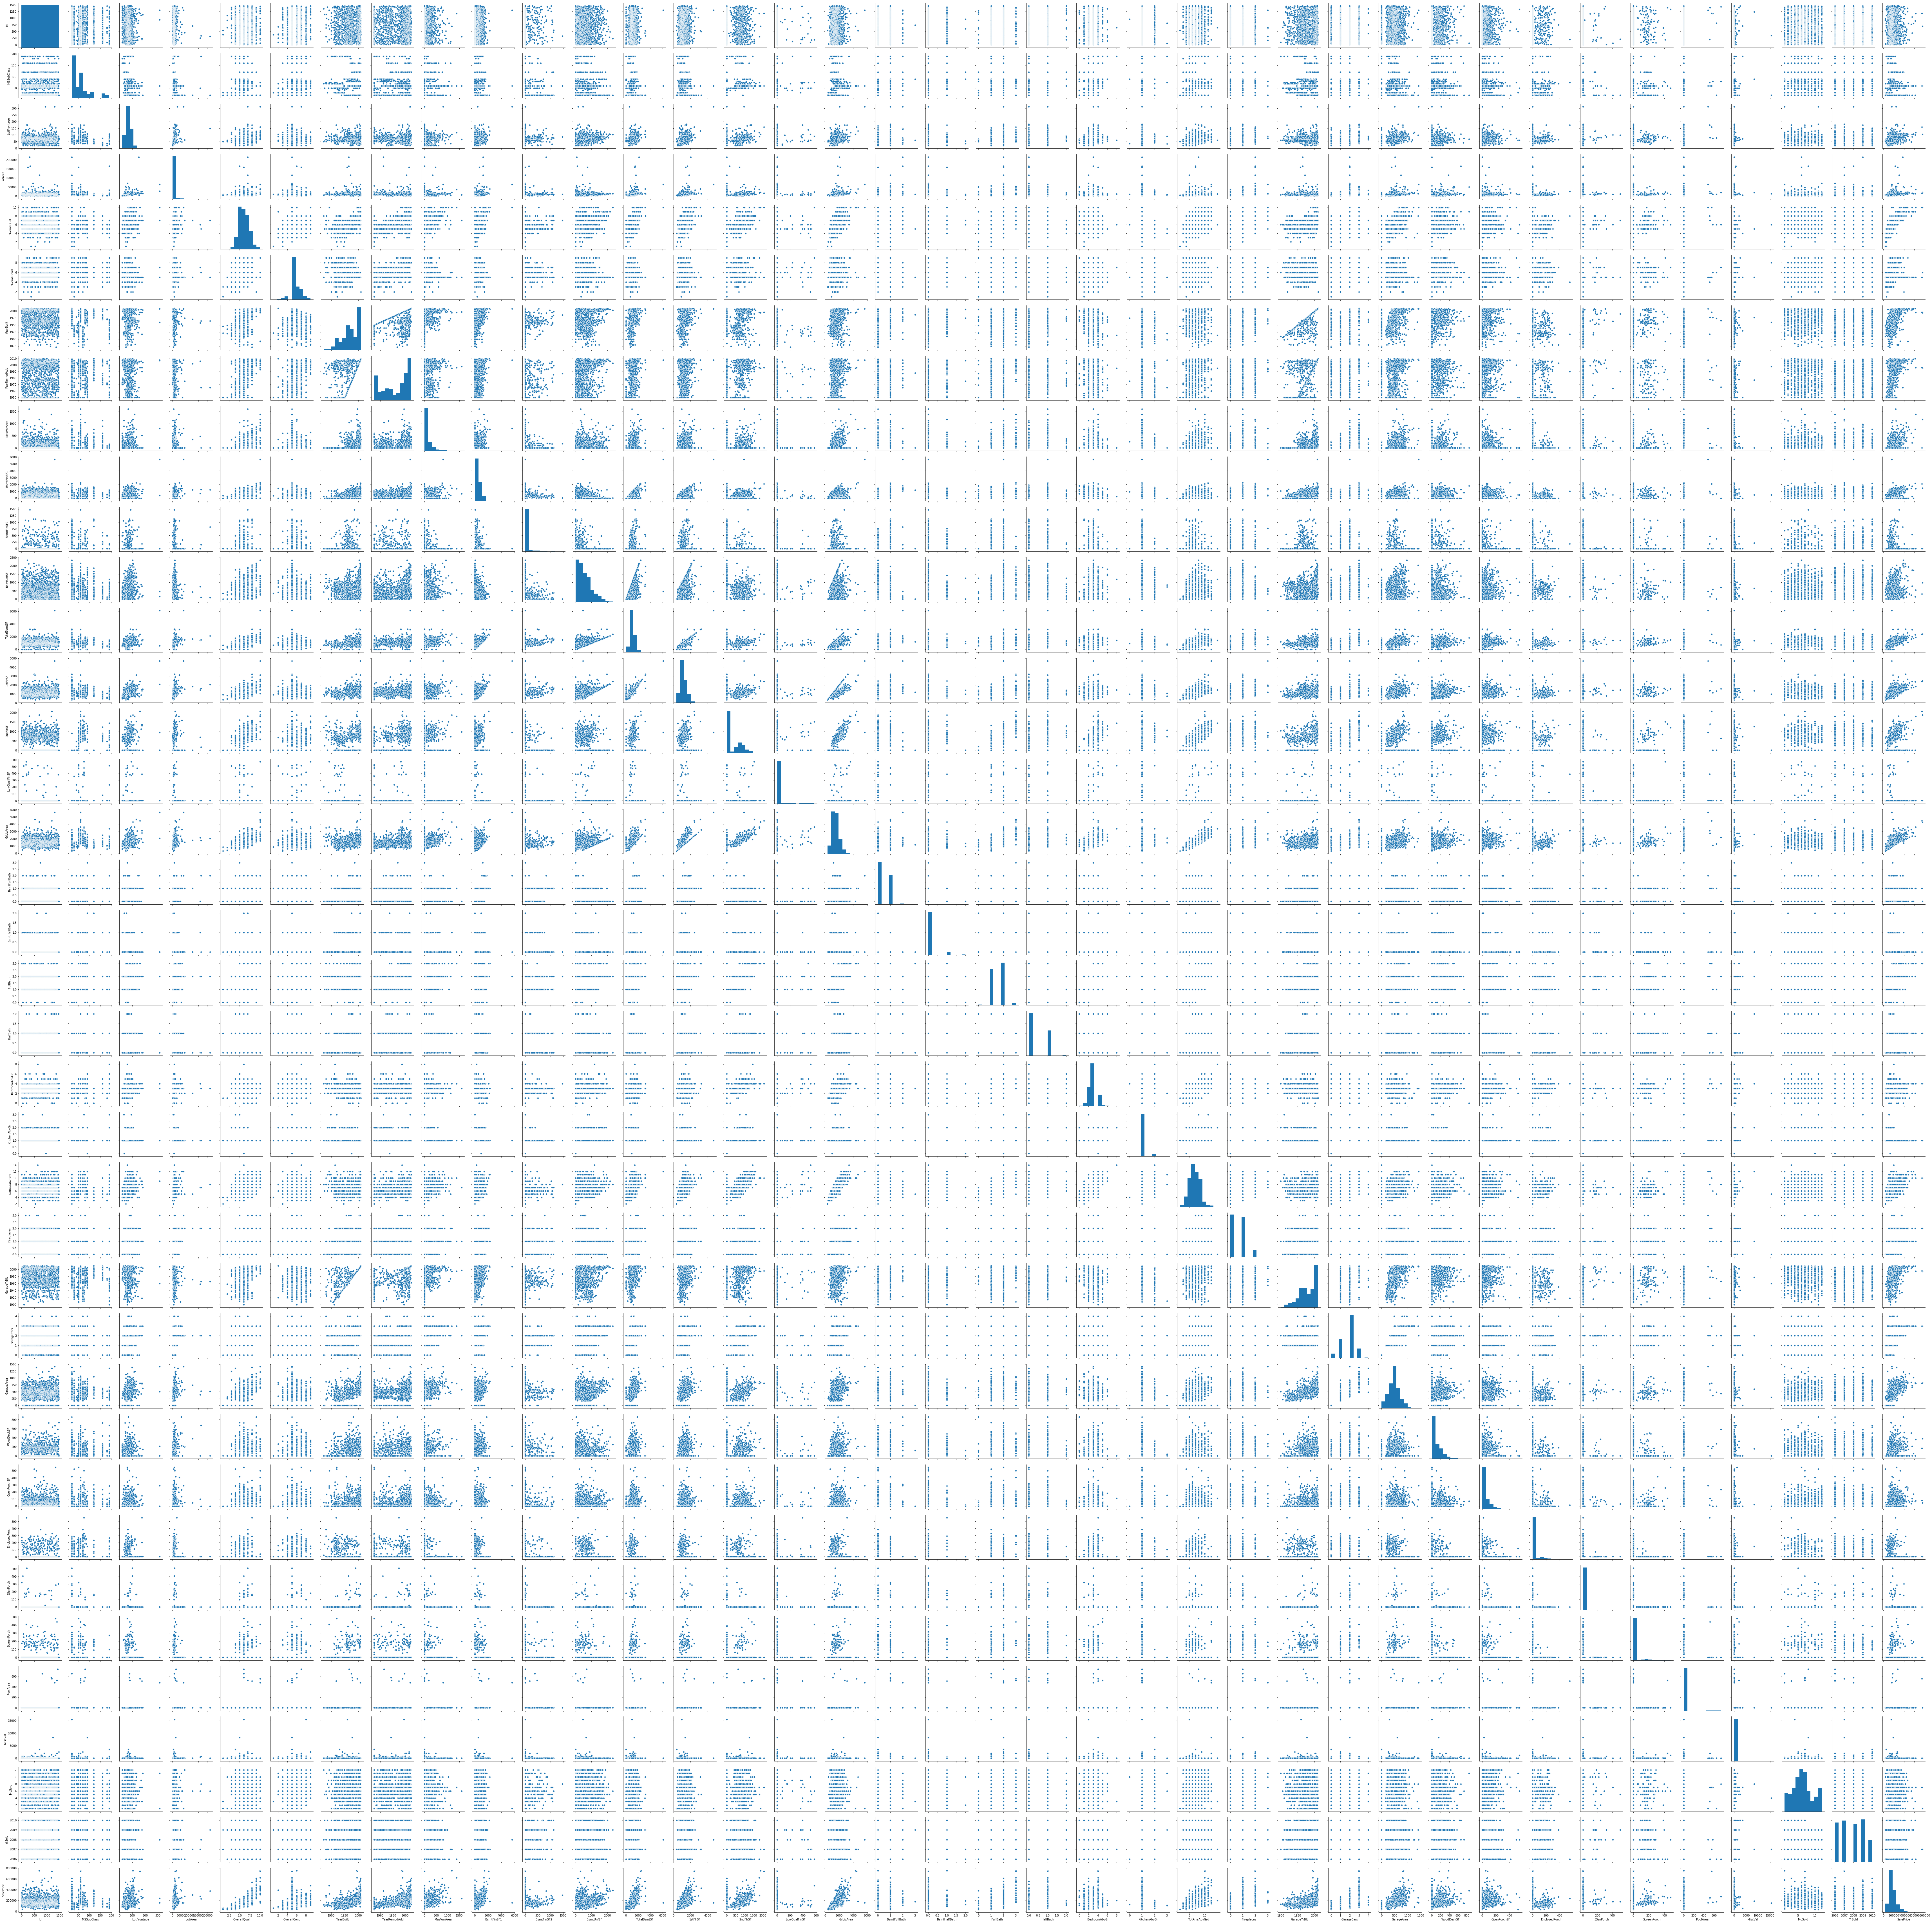

In [33]:
sns.pairplot(df)

In [34]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

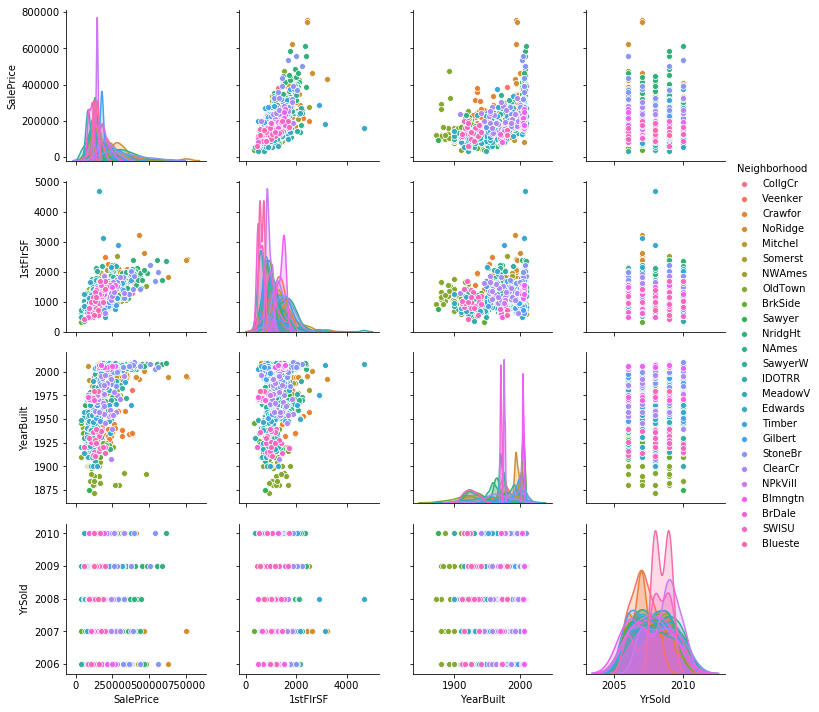

In [148]:
sns.pairplot(df, vars=['SalePrice', '1stFlrSF', 'YearBuilt', 'YrSold'], hue='Neighborhood')

# Helpers

In [113]:
class DataParams:
    def __init__(self, target_col, cat_cols=None, cont_cols=None):
        self.target_col = target_col
        self.feature_cols = cat_cols + cont_cols
        self.cat_cols = cat_cols
        self.cont_cols = cont_cols

# Model

In [225]:
df = pd.read_csv(DATA_DIR/'train.csv')

In [226]:
df.drop('Id', axis=1, inplace=True)

In [227]:
target_col = 'SalePrice'
cont_cols = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
             'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
             'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
             'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
             'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'PoolArea', 
             'MiscVal']

cat_col = list(set(df.columns.tolist()) - set(cont_cols) - set([target_col]))
# cat_col = ["ScreenPorch"]
data_params = DataParams(
    target_col=target_col,
    cat_cols=cat_col,
    cont_cols=cont_cols
)

## train_test_split

In [228]:
TEST_SIZE = 0.2

In [229]:
train_data, test_data, train_labels, test_labels = train_test_split(df[data_params.feature_cols], df[data_params.target_col], test_size=TEST_SIZE)

In [230]:
[x.shape for x in (train_data, test_data, train_labels, test_labels)]

[(1168, 79), (292, 79), (1168,), (292,)]

## Data Preprocessing

In [231]:
from sklearn.impute import SimpleImputer

def mark_missing_values(data, cols):
    data = data.copy()
    na_cols = []
    for col in cols:
        col_na = col+"_na"
        data[col_na] = data[col].isna().astype(int)  
        na_cols.append(col_na)
    return (data, na_cols)

def fit_cont_cols(data, cols):
    imputer = SimpleImputer(strategy='median')
    imputer.fit(data[cols])
    
    scaler = StandardScaler()
    scaler.fit(data[cols])
    return (imputer, scaler)

def fit_cat_cols(data, cols):
    label_encoders = {}
    for cat in cols:
        label_encoders[cat] = LabelEncoder()
        label_encoders[cat].fit(data[cat].astype("str"))
    return label_encoders

def transform_cont_cols(data, cols, inputer, scaler):
    data = data.copy()
    data[cols] = inputer.transform(data[cols])
    data[cols] = scaler.transform(data[cols])
    return data

def transform_cat_cols(data, cols, label_encoders):
    for cat in cols:
        data[cat] = label_encoders[cat].transform(data[cat].astype(str))
    return data

## Mark missing values

In [232]:
train_data, na_cols = mark_missing_values(train_data, data_params.feature_cols)
data_params.cat_cols += na_cols

test_data, _ = mark_missing_values(test_data, data_params.feature_cols)

In [233]:
imputer, scaler = fit_cont_cols(train_data, data_params.cont_cols)
labels_endcoders = fit_cat_cols(pd.concat([test_data, train_data], axis=0), data_params.cat_cols)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [234]:
train_data = transform_cat_cols(train_data, data_params.cat_cols, labels_endcoders)
train_data = transform_cont_cols(train_data, data_params.cont_cols, imputer, scaler)

test_data = transform_cat_cols(test_data, data_params.cat_cols, labels_endcoders)
test_data = transform_cont_cols(test_data, data_params.cont_cols, imputer, scaler)

In [235]:
train_data[data_params.feature_cols].head().T

1002       869       1029       723        658 
PoolQC          3.000000   3.000000  3.000000   3.000000   3.000000
MiscFeature     4.000000   4.000000  4.000000   4.000000   4.000000
FullBath        2.000000   2.000000  1.000000   2.000000   1.000000
ScreenPorch     0.000000   0.000000  0.000000  19.000000   0.000000
BsmtCond        3.000000   3.000000  3.000000   3.000000   3.000000
LandContour     3.000000   3.000000  3.000000   3.000000   3.000000
PavedDrive      2.000000   2.000000  2.000000   2.000000   2.000000
Condition1      6.000000   2.000000  2.000000   2.000000   0.000000
GarageFinish    1.000000   0.000000  2.000000   2.000000   2.000000
CentralAir      1.000000   1.000000  1.000000   1.000000   1.000000
OverallCond     4.000000   4.000000  6.000000   5.000000   4.000000
KitchenAbvGr    1.000000   1.000000  1.000000   1.000000   1.000000
HeatingQC       0.000000   0.000000  2.000000   0.000000   4.000000
ExterQual       2.000000   2.000000  3.000000   3.000000   3.000000
MSSubClass      4.000000   9.000000  1.000000   8.000000   8.000000
LandSlope       0.000000   0.000000  0.000000   0.000000   0.000000
BsmtFinType2    5.000000   5.000000  5.000000   5.000000   5.000000
YrSold          2.000000   4.000000  0.000000   2.000000   4.000000
RoofMatl        1.000000   1.000000  1.000000   1.000000   1.000000
OverallQual     8.000000   7.000000  6.000000   4.000000   6.000000
Utilities       0.000000   0.000000  0.000000   0.000000   0.000000
HouseStyle      2.000000   5.000000  5.000000   0.000000   0.000000
MasVnrType      1.000000   1.000000  1.000000   2.000000   2.000000
GarageType      1.000000   1.000000  5.000000   5.000000   1.000000
Exterior1st    12.000000   8.000000  6.000000   8.000000  12.000000
MSZoning        3.000000   3.000000  4.000000   3.000000   3.000000
Functional      6.000000   6.000000  6.000000   6.000000   6.000000
Electrical      4.000000   4.000000  4.000000   4.000000   4.000000
GarageQual      4.000000   4.000000  4.000000   4.000000   4.000000
GarageCars      3.000000   2.000000  1.000000   1.000000   1.000000
...                  ...        ...       ...        ...        ...
BsmtHalfBath    0.000000   0.000000  1.000000   0.000000   1.000000
KitchenQual     2.000000   2.000000  3.000000   3.000000   3.000000
SaleType        8.000000   8.000000  8.000000   8.000000   8.000000
SaleCondition   4.000000   4.000000  4.000000   4.000000   0.000000
ExterCond       4.000000   4.000000  4.000000   4.000000   4.000000
HalfBath        0.000000   1.000000  1.000000   0.000000   0.000000
Street          1.000000   1.000000  1.000000   1.000000   1.000000
TotRmsAbvGrd    9.000000  10.000000  9.000000   9.000000   8.000000
BsmtQual        2.000000   2.000000  3.000000   3.000000   3.000000
LotFrontage     0.195024   0.400189 -2.020754  -0.420470   0.318123
LotArea         0.172785  -0.046887 -0.945375  -0.239032   0.776202
YearBuilt       1.169628   0.736741  0.037461  -0.561921  -0.761715
YearRemodAdd    1.032972   0.447453 -0.625999  -0.625999  -1.699451
MasVnrArea     -0.277360   0.755337  0.942614  -0.560951  -0.560951
BsmtFinSF1     -0.914308   0.676490 -0.272292  -0.966896  -0.966896
BsmtFinSF2     -0.289736  -0.289736 -0.289736  -0.289736  -0.289736
BsmtUnfSF       2.263837  -0.590248 -0.464668   0.873327   0.807112
TotalBsmtSF     1.178179   0.005629 -0.840218  -0.238280  -0.303173
1stFlrSF        1.063491  -0.249206 -1.249112  -0.415857  -0.633785
2ndFlrSF       -0.804496   1.225948  0.445360   0.278255   0.445360
LowQualFinSF   -0.111888  -0.111888 -0.111888  -0.111888  -0.111888
GrLivArea       0.111016   0.823273 -0.565153  -0.086516  -0.109309
GarageYrBlt     1.135907   0.607494 -0.246096  -0.815156  -1.221628
GarageArea      1.675649   0.497356 -0.963726   0.374814  -0.652657
WoodDeckSF      0.397068   0.494214 -0.768685  -0.768685   0.785652
OpenPorchSF     0.857145   0.646504 -0.286333  -0.707614  -0.707614
EnclosedPorch  -0.369516  -0.369516 -0.369516  -0.369516  -0.369516
3SsnPorc

In [236]:
target_scaler = StandardScaler()
train_labels = target_scaler.fit_transform(pd.DataFrame(train_labels))
test_labels = target_scaler.transform(pd.DataFrame(test_labels))


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


# RandomForestRegressor

In [237]:
regressor_gs = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        "n_estimators": np.linspace(5, 100, 4).astype(int),
        "min_samples_leaf": np.linspace(1, 100, 3).astype(int),
        "max_depth": np.linspace(10, 100, 3).astype(int),
        "max_features": ['sqrt', 'log2', 0.1],
    },
    n_jobs=-1,
    cv=4,
    verbose=1,
)

In [238]:
regressor_gs.fit(train_data, train_labels)

Fitting 4 folds for each of 108 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
E0807 17:59:18.092435 140339423717120 _base.py:627] exception calling callback for <Future at 0x7fa305694780 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/externals/joblib/parallel.py", line 309, in __call__
    self.parallel.dispatch_next()
  File "/opt/conda/lib/python3.7/site-packages/sklearn/externals/joblib/parallel.py", line 731, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/externals/joblib/parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  F

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGKILL(-9)}

### Evaluation

In [178]:
predictions = regressor_gs.predict(test_data)
best_mae = mean_absolute_error(predictions, test_labels)
print(f"Mean absolute error {best_mae}")

Mean absolute error 16541.3539987913


## NN Model

In [127]:
def make_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1),
    ])
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3), 
        loss=tf.keras.losses.mae, 
        metrics=[
            tf.keras.metrics.mae
        ]
    )
    return model

In [128]:
model = make_model(input_shape=[len(data_params.feature_cols)])

In [129]:
EPOCHS=500
VAL_SPLIT=0.2
PATIENCE = 15

In [130]:
model_history = model.fit(
    train_data[data_params.feature_cols],
    train_labels, 
    epochs=EPOCHS,
    validation_split=VAL_SPLIT,
    verbose=1,
    batch_size=16,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(str(TEMP_DIR/'modelmodel.h5'), save_best_only=True),
        tf.keras.callbacks.EarlyStopping(patience=PATIENCE, restore_best_weights=True),
    ],
)

Train on 934 samples, validate on 234 samples
Epoch 1/500
934/934 [==============================] - 0s 300us/sample - loss: 182597.7372 - mean_absolute_error: 182597.7656 - val_loss: 174696.0248 - val_mean_absolute_error: 174696.0156
Epoch 2/500
934/934 [==============================] - 0s 119us/sample - loss: 182353.1816 - mean_absolute_error: 182353.2031 - val_loss: 174332.0875 - val_mean_absolute_error: 174332.1094
Epoch 3/500
934/934 [==============================] - 0s 113us/sample - loss: 181840.6822 - mean_absolute_error: 181840.6875 - val_loss: 173648.5073 - val_mean_absolute_error: 173648.5000
Epoch 4/500
934/934 [==============================] - 0s 130us/sample - loss: 180968.3912 - mean_absolute_error: 180968.4062 - val_loss: 172564.1593 - val_mean_absolute_error: 172564.1719
Epoch 5/500
934/934 [==============================] - 0s 127us/sample - loss: 179655.0748 - mean_absolute_error: 179655.0781 - val_loss: 170996.5676 - val_mean_absolute_error: 170996.5625
Epoch 6/5

In [131]:
def plot_history(history, contains, skip=0):
    df = pd.DataFrame(history.history)
    df[list(df.filter(regex=contains))].iloc[skip:].plot()

In [152]:
model_history.history["loss"][-5:]

[17071.105113256155,
 17053.59718678901,
 17025.868891779308,
 17022.94213187567,
 17008.622356798714]

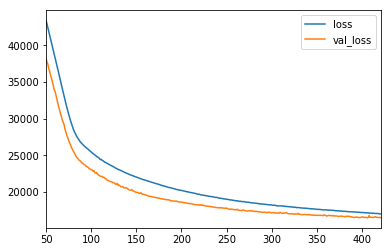

In [133]:
plot_history(model_history, contains='loss', skip=50)

### Evaluation

In [183]:
model.evaluate(test_data[data_params.feature_cols], test_labels)

292/292 [==============================] - 0s 153us/sample - loss: 16260.8136 - mean_absolute_error: 16260.8154


[16260.813570205479, 16260.815]

## Neural network with embeddings

In [135]:
cat_cols_dims = {cat_col: len(labels_endcoders[cat_col].classes_) + 2 for cat_col in data_params.cat_cols}

In [137]:
def make_embeddings_model(cat_cols_dims, n_cont_cols):
    # Input
    inputs = []
    embeddings = []
    
    for dim in cat_cols_dims.values():
        x = tf.keras.layers.Input(shape=(1,))
        inputs.append(x)
        x = tf.keras.layers.Embedding(
            dim,
            np.sqrt(dim).astype(int) + 1,
            input_length=1,
            embeddings_regularizer=tf.keras.regularizers.l1_l2(1e-2, 1e-2),
        )(x)
        x = tf.keras.layers.Flatten()(x)
        embeddings.append(x)
        
    cont_inputs = tf.keras.layers.Input(shape=(n_cont_cols,))
    inputs.append(cont_inputs)
    embeddings.append(cont_inputs)
    
    x = keras.layers.Concatenate()(embeddings)
    
    # Hidden layers
    x = tf.keras.layers.Dense(32, kernel_initializer="he_uniform")(x)
    x = tf.keras.layers.LeakyReLU()(x)
    
    # Output
    tf.keras.layers.Dense(1)(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=x)
    
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3), 
        loss=tf.keras.losses.mean_absolute_error, 
        metrics=[
            tf.keras.metrics.mean_absolute_error,
        ]
    )
    
    return model

In [138]:
embedding_model = make_embeddings_model(
    cat_cols_dims=cat_cols_dims,
    n_cont_cols=len(data_params.cont_cols)
)

In [139]:
embedding_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 1)]          0                                            
____________________________________________________________________________________________

In [179]:
emb_train_data = [train_data[x] for x in train_data[data_params.cat_cols]] + [train_data[data_params.cont_cols]]


In [141]:
history = embedding_model.fit(
    emb_train_data,
    train_labels, 
    epochs=EPOCHS,
    validation_split=VAL_SPLIT,
    verbose=1,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(str(TEMP_DIR/'embedding_model.h5'), save_best_only=True),
        tf.keras.callbacks.EarlyStopping(patience=PATIENCE, restore_best_weights=True),
    ],
)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a

Train on 934 samples, validate on 234 samples
Epoch 1/500
934/934 [==============================] - 14s 15ms/sample - loss: 182652.0605 - mean_absolute_error: 182651.7031 - val_loss: 174838.8038 - val_mean_absolute_error: 174838.6094
Epoch 2/500
934/934 [==============================] - 1s 1ms/sample - loss: 182650.9910 - mean_absolute_error: 182650.7188 - val_loss: 174837.5765 - val_mean_absolute_error: 174837.2656
Epoch 3/500
934/934 [==============================] - 1s 1ms/sample - loss: 182649.4592 - mean_absolute_error: 182649.0469 - val_loss: 174835.6836 - val_mean_absolute_error: 174835.1719
Epoch 4/500
934/934 [==============================] - 1s 1ms/sample - loss: 182647.2515 - mean_absolute_error: 182646.6250 - val_loss: 174833.1313 - val_mean_absolute_error: 174832.4219
Epoch 5/500
934/934 [==============================] - 1s 1ms/sample - loss: 182644.3770 - mean_absolute_error: 182643.5625 - val_loss: 174829.9141 - val_mean_absolute_error: 174829.0156
Epoch 6/500
934/9

### Learning history

In [151]:
history.history["loss"][-5:]

[104042.92200883297,
 103737.14361951285,
 103432.19919365631,
 103124.36385840471,
 102819.62180473769]

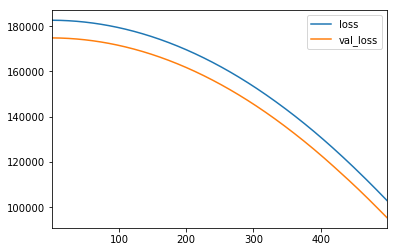

In [150]:
plot_history(history, contains='loss', skip=1)

### Model evaluation

In [181]:
emb_test_data = [test_data[x] for x in test_data[data_params.cat_cols]] + [test_data[data_params.cont_cols]]
embedding_model.evaluate(emb_test_data, test_labels)

292/292 [==============================] - 1s 4ms/sample - loss: 100642.2300 - mean_absolute_error: 98884.0859


[100642.22998715754, 98884.086]

## More advanced model with embeddings

In [162]:
def make_advanced_model(
    input_shape, 
    cat_cols_dims, 
    n_cont_cols,
    n_layers,
    layer_size,
    batch_norm,
    dropout_rate,
    learning_rate,
    kernel_regularizer
):
    # Input
    inputs = []
    embeddings = []
    
    for dim in cat_cols_dims.values():
        x = keras.layers.Input(shape=(1,))
        inputs.append(x)
        x = keras.layers.Embedding(
            dim,
            np.sqrt(dim).astype(int) + 1,
            input_length=1,
            embeddings_regularizer=tf.keras.regularizers.l1_l2(1e-2, 1e-2),
        )(x)
        x = tf.keras.layers.Flatten()(x)
        embeddings.append(x)
        
    cont_inputs = tf.keras.layers.Input(shape=(n_cont_cols,))
    inputs.append(cont_inputs)
    embeddings.append(cont_inputs)
    x = keras.layers.Concatenate()(embeddings)
    
    # Hidden layers
    for _ in range(n_layers):
        if batch_norm:
            x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Dropout(dropout_rate)(x)
        x = tf.keras.layers.Dense(
            layer_size,
            kernel_initializer="he_uniform",
            kernel_regularizer=kernel_regularizer and tf.keras.regularizers.l1_l2(*kernel_regularizer),
        )(x)
        x = tf.keras.layers.LeakyReLU()(x)
    
    # Output
    tf.keras.layers.Dense(1),
    
    model = tf.keras.Model(inputs=inputs, outputs=x)
    
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate), 
        loss=tf.keras.losses.mae, 
        metrics=[
            tf.keras.metrics.mae
        ]
    )
    
    return model

In [163]:
advanced_model = make_advanced_model(
    input_shape=[len(data_params.feature_cols)], 
    cat_cols_dims=cat_cols_dims,
    n_cont_cols=len(data_params.cont_cols),
    n_layers=3,
    layer_size=32,
    batch_norm=True,
    dropout_rate=0.1,
    learning_rate=1e-5,
    kernel_regularizer=(1e-5, 3e-3)
)

In [164]:
advanced_model_history = advanced_model.fit(
    emb_train_data,
    train_labels, 
    epochs=100,
    validation_split=VAL_SPLIT,
    verbose=1,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(str(TEMP_DIR/'advanced_model.h5'), save_best_only=True),
        tf.keras.callbacks.EarlyStopping(patience=PATIENCE, restore_best_weights=True),
    ],
)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a

Train on 934 samples, validate on 234 samples
Epoch 1/100
934/934 [==============================] - 17s 18ms/sample - loss: 182652.9901 - mean_absolute_error: 182651.6094 - val_loss: 174840.5725 - val_mean_absolute_error: 174839.2031
Epoch 2/100
934/934 [==============================] - 1s 1ms/sample - loss: 182652.9821 - mean_absolute_error: 182651.5781 - val_loss: 174840.5626 - val_mean_absolute_error: 174839.2031
Epoch 3/100
934/934 [==============================] - 1s 1ms/sample - loss: 182652.9648 - mean_absolute_error: 182651.6094 - val_loss: 174840.5571 - val_mean_absolute_error: 174839.2188
Epoch 4/100
934/934 [==============================] - 1s 1ms/sample - loss: 182652.9672 - mean_absolute_error: 182651.6094 - val_loss: 174840.5284 - val_mean_absolute_error: 174839.2031
Epoch 5/100
934/934 [==============================] - 1s 1ms/sample - loss: 182652.9487 - mean_absolute_error: 182651.5938 - val_loss: 174840.5198 - val_mean_absolute_error: 174839.1719
Epoch 6/100
934/9

In [31]:
advanced_model_history = advanced_model.fit(
    train_data[data_params.feature_cols],
    train_labels, 
    epochs=EPOCHS,
    validation_split=VAL_SPLIT,
    verbose=1,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(str(TEMP_DIR/'nn_advanced_model_history.h5'), save_best_only=True),
        tf.keras.callbacks.EarlyStopping(patience=60, restore_best_weights=True),
    ],
)

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 138 array(s), but instead got the following list of 1 arrays: [array([[ 8.        ,  8.        ,  1.        , ..., -0.11773654,
        -0.07684505, -0.08942258],
       [14.        ,  8.        ,  1.        , ..., -0.11773654,
        -0.07684505, -0.08942258],...

In [165]:
advanced_model_history.history["loss"][-5:]

[182652.17237687367,
 182652.16167023554,
 182652.15400829766,
 182652.14855460386,
 182652.143368576]

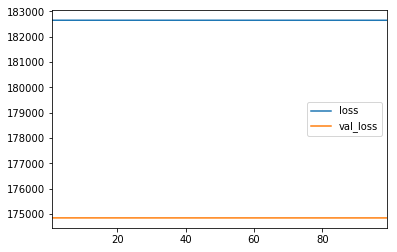

In [166]:
plot_history(advanced_model_history, contains='loss', skip=1)

In [167]:
advanced_model.evaluate(test_data[data_params.feature_cols], test_labels)

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 138 array(s), but instead got the following list of 1 arrays: [array([[ 3.        ,  4.        ,  2.        , ..., -0.12515974,
        -0.07684505, -0.1063077 ],
       [ 3.        ,  4.        ,  1.        , ..., -0.12515974,
        -0.07684505, -0.1063077 ],...